<h2> Complaint Analysis </h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
body = "NYC_311_Data_Sort.csv"
df = pd.read_csv(body)

In [4]:
##drop the unnecessary columns
df = df[['Unique Key', 'Created Date', 'Closed Date', 'Complaint Type', 'Descriptor', 'Incident Zip', 'Incident Address',
         'Street Name', 'City', 'Status', 'Resolution Description', 'Borough', 'Open Data Channel Type']]

In [5]:
##change format of datetime columns
df['Created Date']=pd.to_datetime(df['Created Date'], format='%m/%d/%Y %I:%M:%S %p')
df['Closed Date']=pd.to_datetime(df['Closed Date'], format='%m/%d/%Y %I:%M:%S %p')

In [6]:
df['Created Year']=df['Created Date'].dt.year
df['Created Month']=df['Created Date'].dt.month

In [7]:
df["Closure Time in Hours"]= (df['Closed Date'] - df['Created Date']).astype('timedelta64[h]')

<h2> Complaint Count Analysis </h2>

C:\Users\sujit\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1330: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


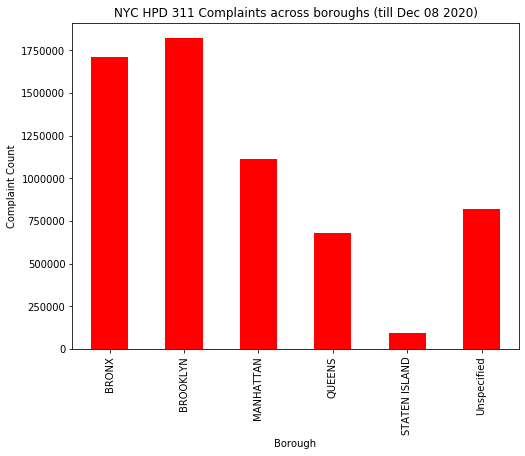

In [8]:
##complaint distribution across boroughs
graph = df.groupby(['Borough'])['Unique Key'].count()
graph.plot(kind = 'bar', figsize = (8, 6), color = 'R')
plt.ylabel("Complaint Count")
plt.title("NYC HPD 311 Complaints across boroughs (till Dec 08 2020)")
plt.show()

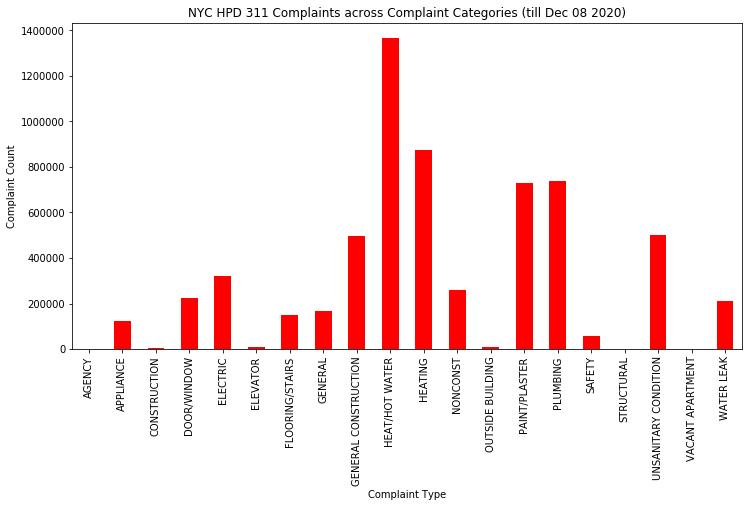

In [34]:
##complaint distribution across complaint categories
graph = df.groupby(['Complaint Type'])['Unique Key'].count()
graph.plot(kind = 'bar', figsize = (12, 6), color = 'R')
plt.ylabel("Complaint Count")
plt.title("NYC HPD 311 Complaints across Complaint Categories (till Dec 08 2020)")
plt.show()

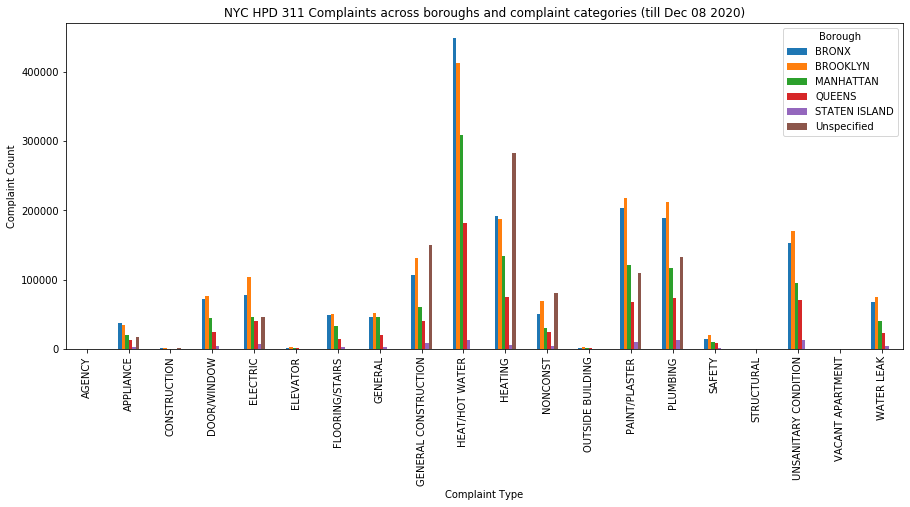

In [35]:
##complaint distribution across complaint categories
graph = df.groupby(['Complaint Type', 'Borough'])['Unique Key'].count().unstack().fillna(0)
graph.plot(kind = 'bar', figsize = (15,6))
plt.ylabel("Complaint Count")
plt.title("NYC HPD 311 Complaints across boroughs and complaint categories (till Dec 08 2020)")
plt.show()

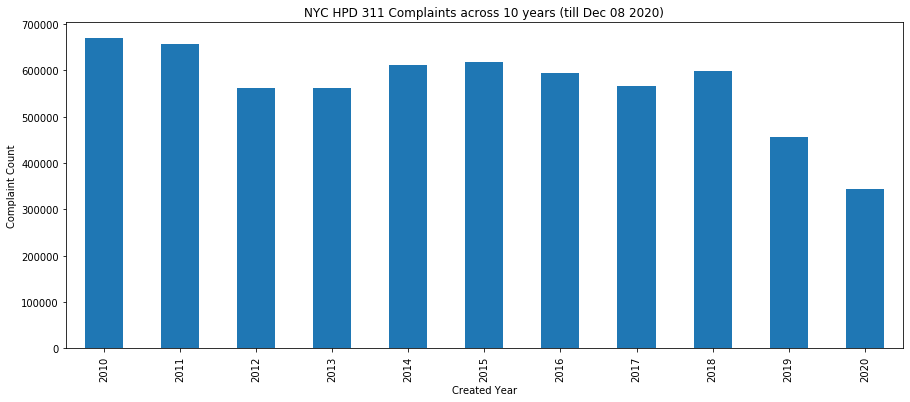

In [53]:
##complaint distribution across 10 years
graph = df.groupby(['Created Year'])['Unique Key'].count()
graph.plot(kind = 'bar', figsize = (15,6))
plt.ylabel("Complaint Count")
plt.title("NYC HPD 311 Complaints across 10 years (till Dec 08 2020)")
plt.show()

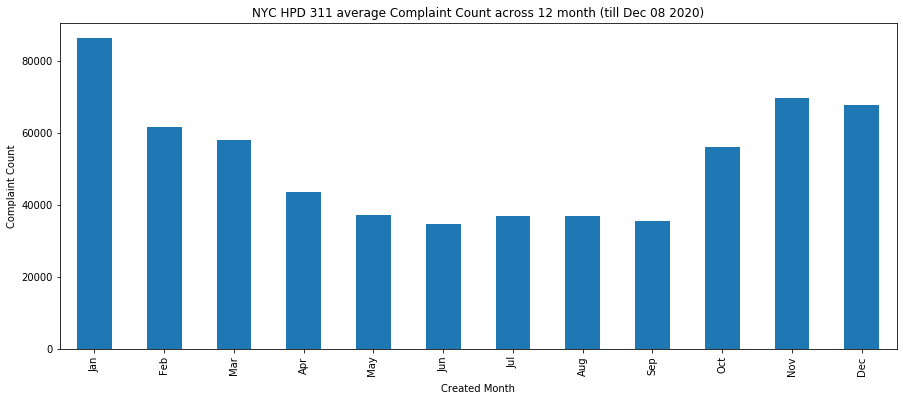

In [86]:
##complaint distribution across complaint categories
graph = df.groupby(['Created Month'])['Unique Key'].count()/10
graph.plot(kind = 'bar', figsize = (15,6))
plt.ylabel("Complaint Count")
positions = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)
labels = ("Jan", "Feb", "Mar", "Apr", " May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")
plt.xticks(positions, labels)
plt.title("NYC HPD 311 average Complaint Count across 12 month (till Dec 08 2020)")
plt.show()

<h2> Closure Time Analysis </h2>

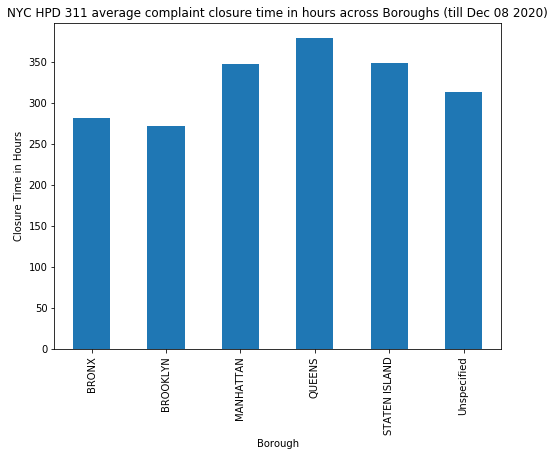

In [62]:
##Closure time distribution across boroughs
graph = df.groupby(['Borough'])['Closure Time in Hours'].mean().dropna()
graph.plot(kind = 'bar', figsize = (8,6))
plt.ylabel("Closure Time in Hours")
plt.title("NYC HPD 311 average complaint closure time in hours across Boroughs (till Dec 08 2020)")
plt.show()

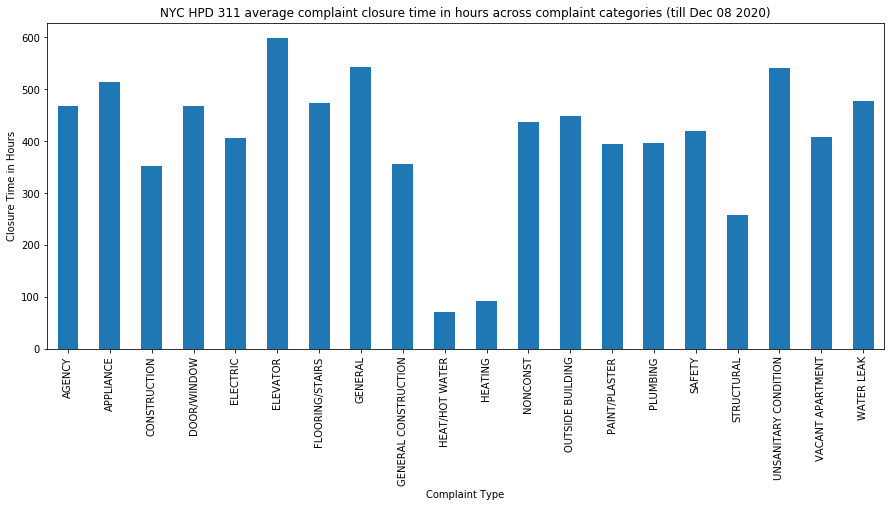

In [63]:
##Closure time distribution across complaint categories
graph = df.groupby(['Complaint Type'])['Closure Time in Hours'].mean().dropna(0)
graph.plot(kind = 'bar', figsize = (15,6))
plt.ylabel("Closure Time in Hours")
plt.title("NYC HPD 311 average complaint closure time in hours across complaint categories (till Dec 08 2020)")
plt.show()

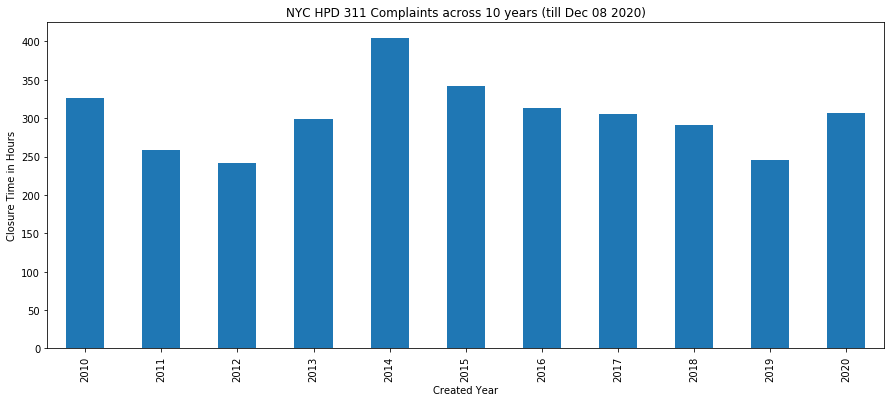

In [64]:
##closure time distribution across 10 years
graph = df.groupby(['Created Year'])['Closure Time in Hours'].mean().dropna()
graph.plot(kind = 'bar', figsize = (15,6))
plt.ylabel("Closure Time in Hours")
plt.title("NYC HPD 311 Complaints across 10 years (till Dec 08 2020)")
plt.show()

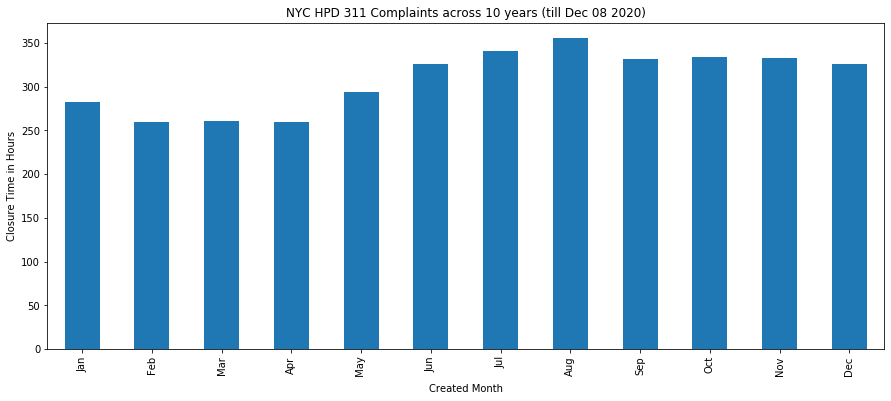

In [88]:
##closure time distribution across 12 months of year
graph = df.groupby(['Created Month'])['Closure Time in Hours'].mean().dropna()
graph.plot(kind = 'bar', figsize = (15,6))
plt.ylabel("Closure Time in Hours")
positions = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)
labels = ("Jan", "Feb", "Mar", "Apr", " May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")
plt.xticks(positions, labels)
plt.title("NYC HPD 311 Complaints across 10 years (till Dec 08 2020)")
plt.show()

<h2> Effect of COVID-19 </h2>

In [89]:
df_covid = df[(df['Created Year'] == 2019) | (df['Created Year'] == 2020)]

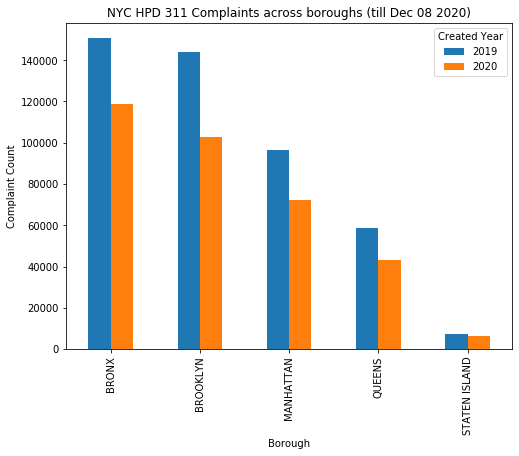

In [90]:
##complaint distribution across boroughs
graph = df_covid.groupby(['Borough', 'Created Year'])['Unique Key'].count().unstack()
graph.plot(kind = 'bar', stacked = False, figsize = (8, 6))
plt.ylabel("Complaint Count")
plt.title("NYC HPD 311 Complaints across boroughs (till Dec 08 2020)")
plt.show()

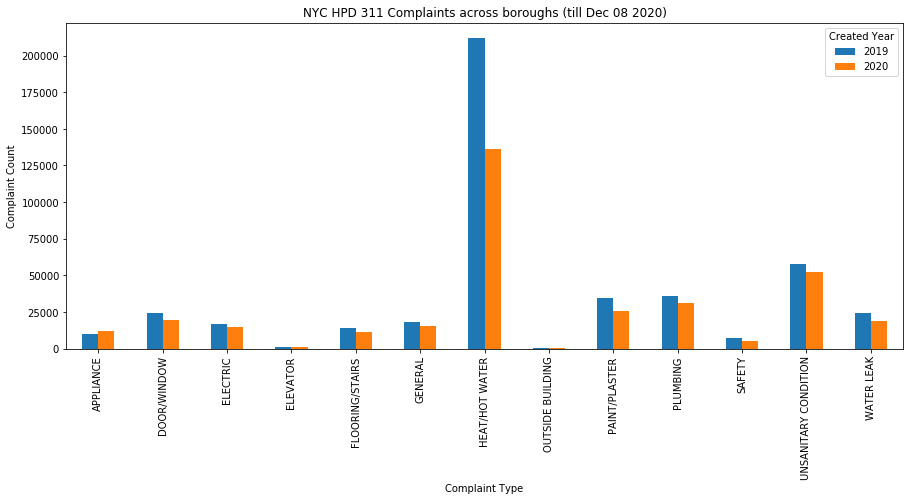

In [91]:
##complaint distribution across boroughs
graph = df_covid.groupby(['Complaint Type', 'Created Year'])['Unique Key'].count().unstack()
graph.plot(kind = 'bar', stacked = False, figsize = (15, 6))
plt.ylabel("Complaint Count")
plt.title("NYC HPD 311 Complaints across boroughs (till Dec 08 2020)")
plt.show()

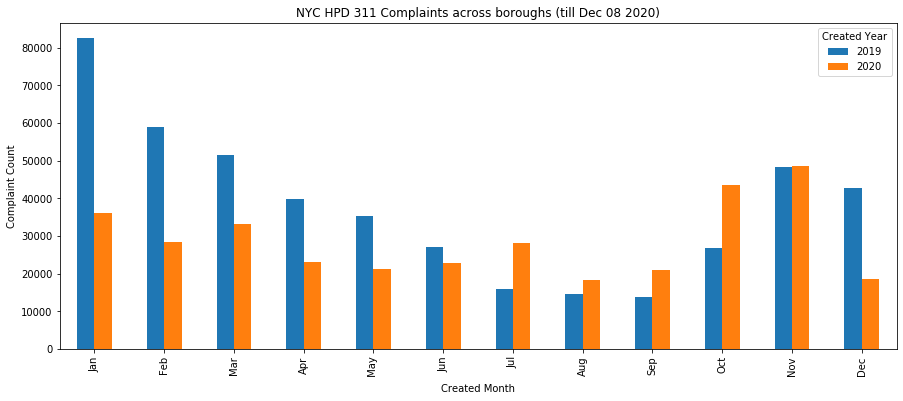

In [92]:
##complaint distribution across boroughs
graph = df_covid.groupby(['Created Month', 'Created Year'])['Unique Key'].count().unstack()
graph.plot(kind = 'bar', stacked = False, figsize = (15, 6))
plt.ylabel("Complaint Count")
positions = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)
labels = ("Jan", "Feb", "Mar", "Apr", " May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")
plt.xticks(positions, labels)
plt.title("NYC HPD 311 Complaints across boroughs (till Dec 08 2020)")
plt.show()